<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/Covid_Trends_and_Cases_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google once noticed that the number of people searching *Flu Symptoms* were a good predictor of an impending rise in Flue cases. So we wonder are people's Google searches for *Covid Symptom* a leading indicator of future cases?  In other words do people Google *Covid Symptom* some predictable time before they show up as a Confirmed Case in NYS data?

Let us compare the Google Search Data with the NYS Data of New Cases.


In [ ]:
options(warn=-1)


In [ ]:
library(tidyverse)
library(ggplot2)


In [ ]:
#searches and data
S_D<- read_csv("COVID_NYS_since_Feb_2020.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Day = col_date(format = ""),
  Google_Search_Interest_New_Cases = col_double(),
  CASE_COUNT = col_double(),
  HOSPITALIZED_COUNT = col_double(),
  DEATH_COUNT = col_double()
)




Here is what the NYS data look like .  We need to add the Google search data. NOTE the Google search data is not missing, it is pushed all the way up against the Day.

In [ ]:
head(S_D)

Day,Google_Search_Interest_New_Cases,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-29,3,1,0,0
2020-03-01,4,1,1,0
2020-03-02,4,5,2,0
2020-03-03,5,3,8,0
2020-03-04,7,8,5,0
2020-03-05,9,7,6,0


In [ ]:
A<- ggplot(S_D,aes(x=Day))+
geom_line(aes(y=CASE_COUNT),color ="darkred")+
geom_line(aes(y=HOSPITALIZED_COUNT),color ="BLUE")+
geom_line(aes(y=DEATH_COUNT),color ="BLACK")+
geom_line(aes(y= Google_Search_Interest_New_Cases),color ="YELLOW")


Here we compare the Google Search data - which is ranked from 1 to 100,  with the NYS Confirmed Cases , which runs from 1 to almost 2,000, and Hospitilaization death county which thankfully do not run as high

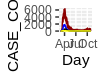

In [ ]:
A

In [ ]:
#Make data skinny to plot with legend
### MAKE DATA SKINNY

SkinnyCovid_Data<-S_D %>%
      pivot_longer(!Day ,names_to="category",values_to="count")




In [ ]:
head(SkinnyCovid_Data)

Day,category,count
<date>,<chr>,<dbl>
2020-02-29,Google_Search_Interest_New_Cases,3
2020-02-29,CASE_COUNT,1
2020-02-29,HOSPITALIZED_COUNT,0
2020-02-29,DEATH_COUNT,0
2020-03-01,Google_Search_Interest_New_Cases,4
2020-03-01,CASE_COUNT,1


In [ ]:
# multi line graph with legend
E<- ggplot(SkinnyCovid_Data, aes(x=Day, y=count))+
geom_line(aes(color= category))+
scale_color_manual(values = c("yellow","black","green","orange"))



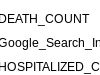

In [ ]:
E

E


We will scale the data , keeping the relative distances from smallest to largest numbers the same but each running only fro -1 to 1

In [ ]:
no_date<- read_csv("Covid_Data_No_Date.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Google_Search_Interest_New_Cases = col_double(),
  CASE_COUNT = col_double(),
  HOSPITALIZED_COUNT = col_double(),
  DEATH_COUNT = col_double()
)




In [ ]:
no_date_scaled<- scale(no_date)

In [ ]:
no_date_scaled

In [ ]:
Covid_Data<- read_csv("Covid_Data_Scaled.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Day = col_date(format = ""),
  Google_Search_Interest_New_Cases = col_double(),
  CASE_COUNT = col_double(),
  HOSPITALIZED_COUNT = col_double(),
  DEATH_COUNT = col_double()
)




In [ ]:
write.csv(no_date_scaled,"no_date.csv")

In [ ]:
B<- ggplot(Covid_Data,aes(x=Day))+
geom_line(aes(y=CASE_COUNT),color ="darkred")+
geom_line(aes(y=HOSPITALIZED_COUNT),color ="BLUE")+
geom_line(aes(y=DEATH_COUNT),color ="BLACK")+
geom_line(aes(y= Google_Search_Interest_New_Cases),color ="YELLOW")


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


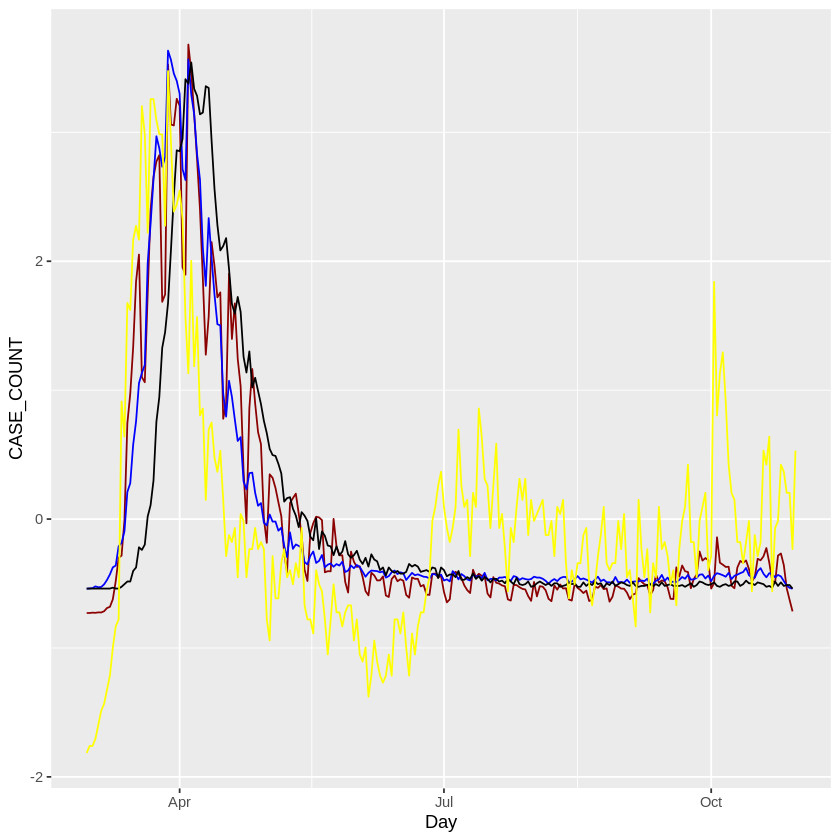

In [ ]:
B

In [ ]:
D<- ggplot(Covid_Data,aes(x=Day))+
geom_line(aes(y=CASE_COUNT),color ="darkred")+
geom_line(aes(y= Google_Search_Interest_New_Cases),color ="YELLOW")

Now let us focus on the Google search data and the Case Count.
 At the end of June the number of google searches for Covid Symptoms starts to climb but there is change in the Case Count.  Starting In September searches for Covid Symptoms again go up and this time they are accompaniend  by  a rise in cases.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


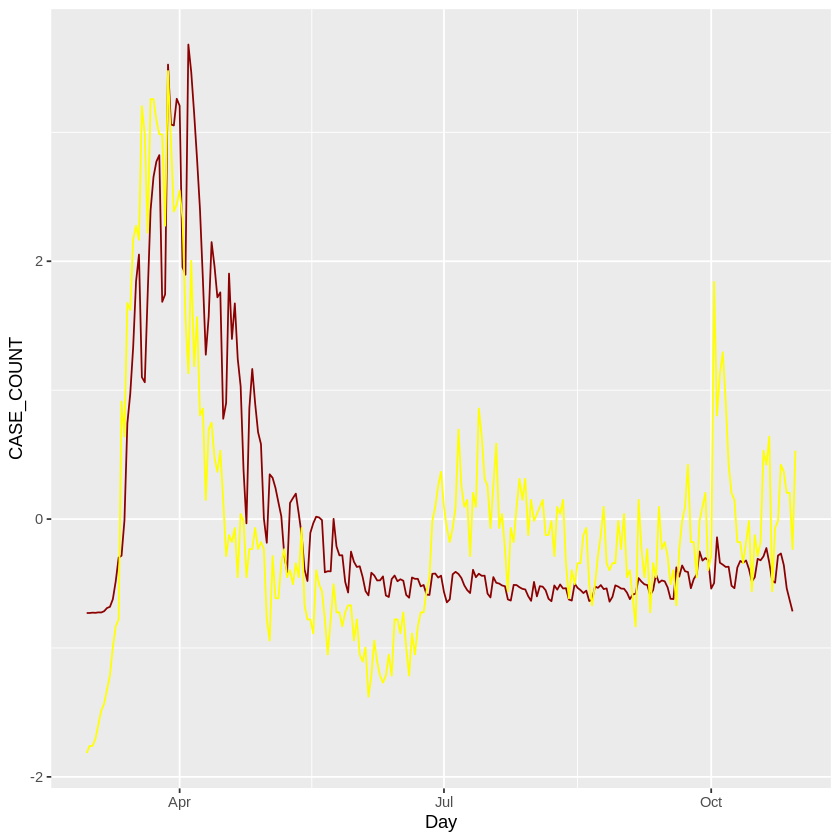

In [ ]:
D

So it seems Google Search Data is not a leading indicator of future Covid Cases.

In [ ]:
C<- ggplot(Covid_Data,aes(x=Day))+
geom_smooth(aes(y=CASE_COUNT),color ="red",size=1)+
geom_smooth(aes(y= Google_Search_Interest_New_Cases),color ="blue",size=1)+
theme(legend.position = c(0, 1),legend.justification = c(0, 1))+
    scale_color_manual(values = c("red","blue"))
  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



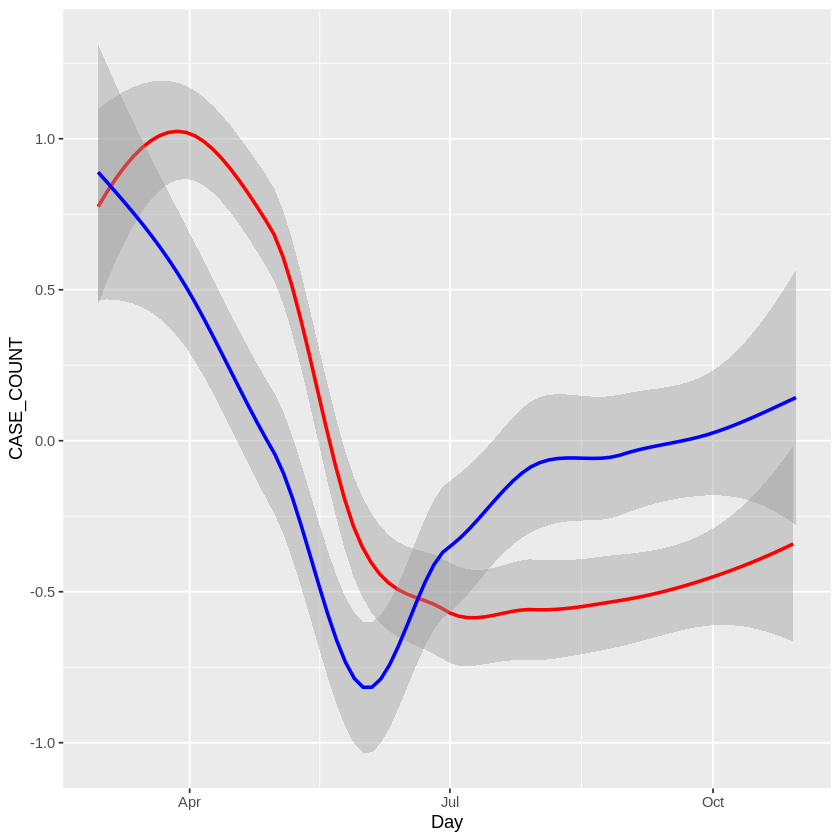

In [ ]:
C

In [ ]:
### MAKE DATA SKINNY
Covid_Data_Skinny <- gather(Covid_Data,Condition,measurement,Google_Search_Interest_New_Cases:CASE_COUNT,
                      factor_key=TRUE)

In [ ]:
Covid_Data_Skinny

ERROR: ignored

In [ ]:
E<- ggplot(Covid_Data_Skinny,aes(x=Day))+
geom_line(aes(y=CASE_COUNT),color ="darkred")+
geom_line(aes(y= Google_Search_Interest_New_Cases),color ="YELLOW")

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'CASE_COUNT' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

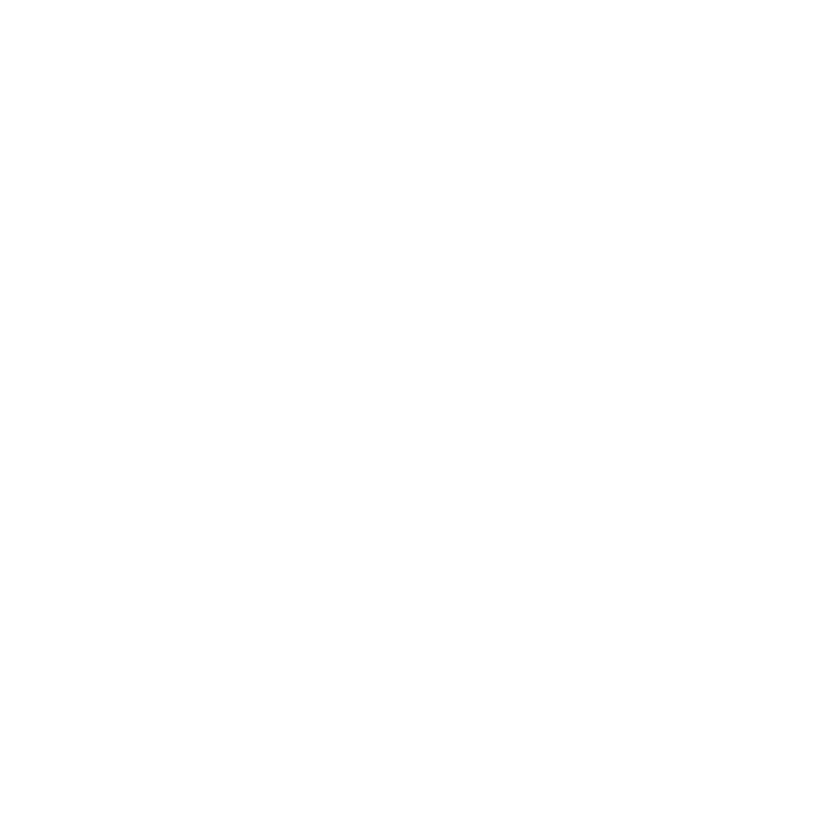

In [ ]:
E

In [ ]:
B<- ggplot(S_D,aes(x=Day))+
geom_line(aes(y=CASE_COUNT),color ="darkred")+
geom_line(aes(y= Google_Search_Interest_New_Cases),color ="YELLOW")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


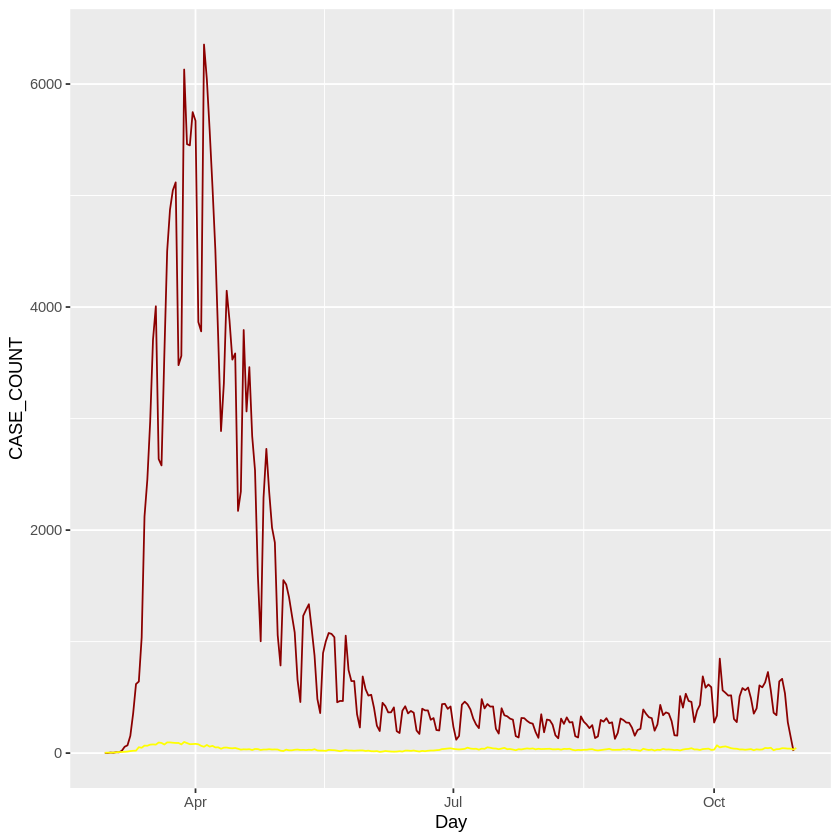

In [ ]:
B

In [ ]:
dat <- data.frame(x = rnorm(10, 30, .2), y = runif(10, 3, 5))

In [ ]:
dat

x,y
<dbl>,<dbl>
29.84154,4.512969
29.69990,4.834211
29.92971,3.661396
30.02935,3.211485
30.05337,3.255534
30.05775,4.145909
29.99542,4.266825
29.96826,4.670233
30.01556,3.127083


In [ ]:
scaled.dat<- scale(dat)

In [ ]:
scaled.dat

x,y
-0.92181152,0.6719233
-1.78380928,1.1405778
-0.38523985,-0.5704203
0.22120515,-1.2267873
0.36737540,-1.1625246
0.39404152,0.1364268
0.01468111,0.3128296
-0.15059063,0.9013541
0.13725942,-1.3499197
2.10688867,1.1465403


In [ ]:
T_C<- read_csv("Covid_Trends_And_New_Cases.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Day = col_date(format = ""),
  Google_Search_Interest = col_double(),
  New_Cases = col_double()
)




In [ ]:
head(T_C)

Day,Google_Search_Interest,New_Cases
<date>,<dbl>,<dbl>
2020-10-01,27,1383
2020-10-02,59,1601
2020-10-03,64,1728
2020-10-04,58,1226
2020-10-05,85,937
2020-10-06,40,1394


Google Trends let's us see how many people are searching on a topic.  Here we compare how many people are searching the term ***Covid Symptom*** in NYS with NYS daily record of New Cases.

In [ ]:
str(T_C)

tibble [30 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Day                   : Date[1:30], format: "2020-10-01" "2020-10-02" ...
 $ Google_Search_Interest: num [1:30] 27 59 64 58 85 40 54 100 32 26 ...
 $ New_Cases             : num [1:30] 1383 1601 1728 1226 937 ...
 - attr(*, "spec")=
  .. cols(
  ..   Day = col_date(format = ""),
  ..   Google_Search_Interest = col_double(),
  ..   New_Cases = col_double()
  .. )


In [ ]:
coef <- 5

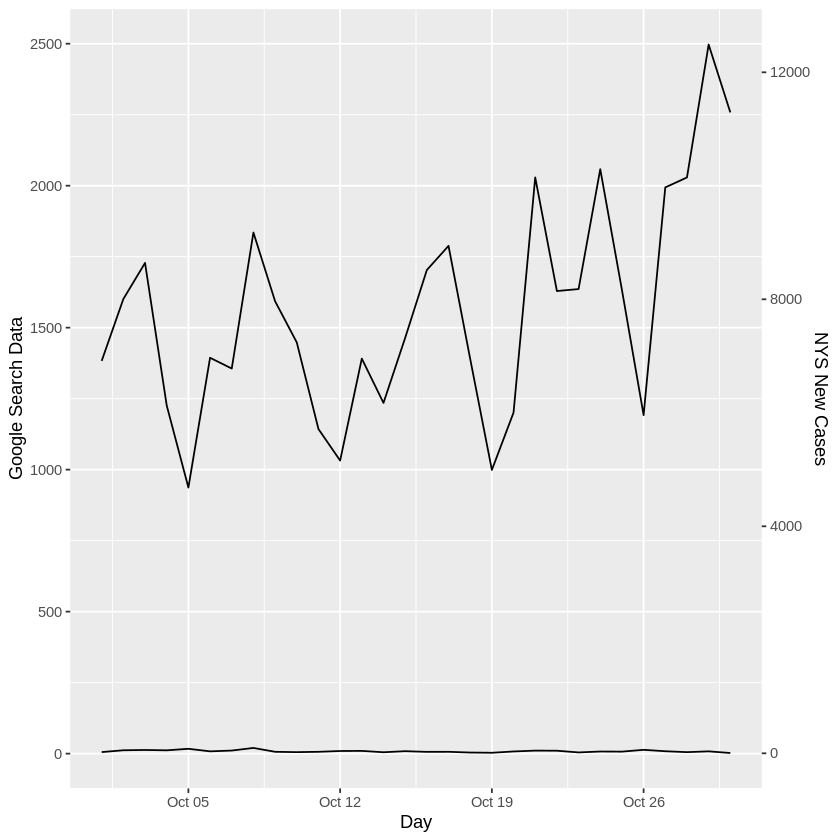

In [ ]:
ggplot(T_C, aes(x=Day))+
geom_line(aes(y=New_Cases))+
geom_line(aes(y=Google_Search_Interest/coef))+
scale_y_continuous(name="Google Search Data", sec.axis=sec_axis(~.*coef, name="NYS New Cases"))

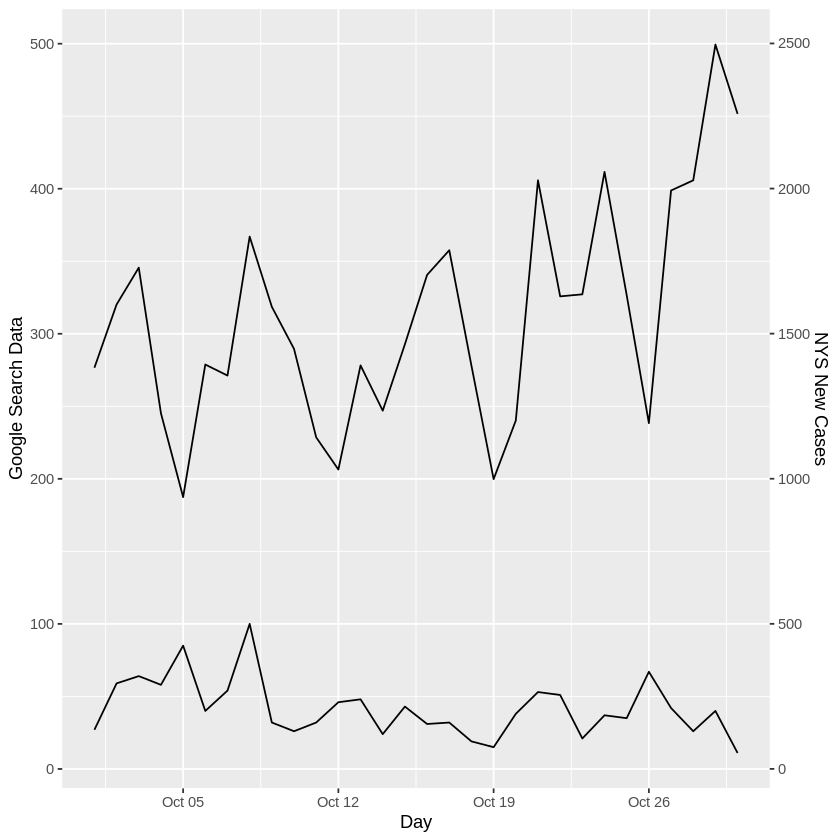

In [ ]:
ggplot(T_C, aes(x=Day))+
geom_line(aes(y=Google_Search_Interest))+
geom_line(aes(y=New_Cases/coef))+
scale_y_continuous(name="Google Search Data", sec.axis=sec_axis(~.*coef, name="NYS New Cases"))


In [ ]:
a<-ggplot(T_C)+
geom_bar(aes(x=Day,y=New_Cases),stat="identity",fill="blue",color = "black")+
  geom_line(aes(x=Day,y=Google_Search_Interest*max(T_C$New_Cases)),stat="identity",color="red")+
  scale_y_continuous(sec.axis = sec_axis(~./max(T_C$New_Cases)))


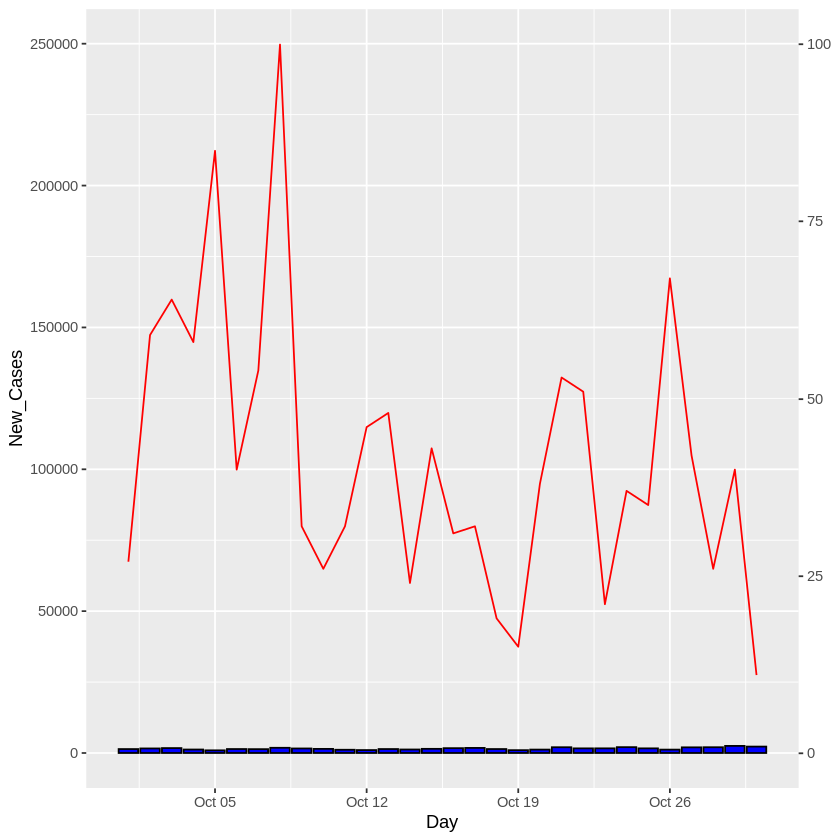

In [ ]:
a

In [ ]:
p<-ggplot(T_C,aes(x=Day))
p<- p + geom_line(aes(y=Google_Search_Interest, color="blue"))
p<- p + geom_line(aes(y=New_Cases, color="red"))
p<- p + scale_y_continuous(sec.axis = sec_axis(~(.+1)*1))


In [ ]:
p<-ggplot(T_C,aes(x=Day))
p<- p + geom_line(aes(y=Google_Search_Interest, color="blue"))
p<- p + geom_line(aes(y=New_Cases, color="red"))
p<- p + scale_y_continuous(sec.axis = sec_axis(~.*0.01))

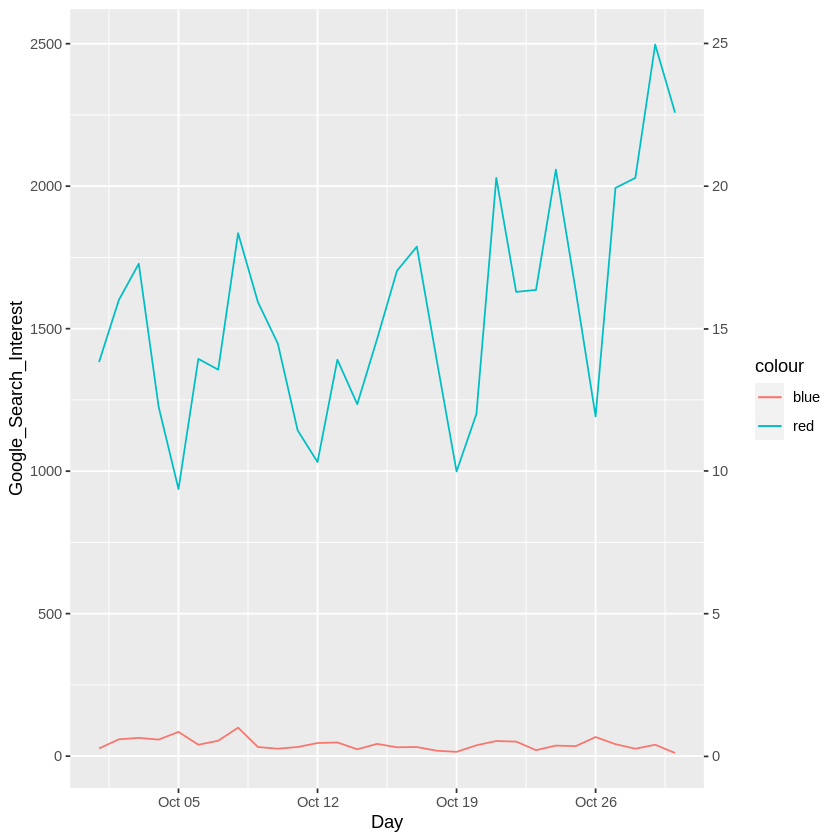

In [ ]:
p

In [ ]:
ggplot(T_C, aes(x=Day))+
geom_line(aes(y=Google_Search_Interest,color="Google_Search_Interest"))+
geom_line(aes(y=New_Cases,color="New_Cases"))+
scale_y_continuous(name="first Axis", sec.axis=sec_axis(name="Second Axis"))

ERROR: ignored

In [ ]:
ggplot(T_C, aes(x=Day))+
geom_line(aes(y=Google_Search_Interest),col="blue")+
geom_line(aes(y=New_Cases),col="red")+
scale_y_continuous(limits=c(0,5000),sec.axis=sec_axis(name="second axis"))

ERROR: ignored

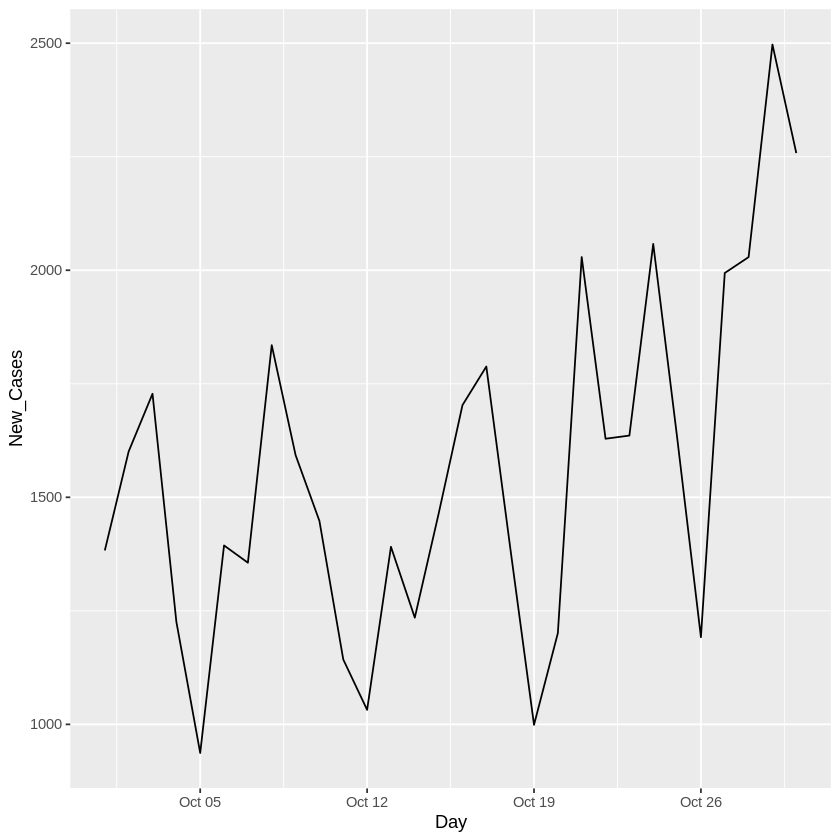

In [ ]:
ggplot(data=T_C, aes(x=Day,y=New_Cases,group=1))+
geom_line(Google_Search_Interest)+
geom_line(Google_Search_Interest)

In [ ]:
str(T_C)

tibble [30 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Day                   : Date[1:30], format: "2020-10-01" "2020-10-02" ...
 $ Google_Search_Interest: num [1:30] 27 59 64 58 85 40 54 100 32 26 ...
 $ New_Cases             : num [1:30] 1383 1601 1728 1226 937 ...
 - attr(*, "spec")=
  .. cols(
  ..   Day = col_date(format = ""),
  ..   Google_Search_Interest = col_double(),
  ..   New_Cases = col_double()
  .. )


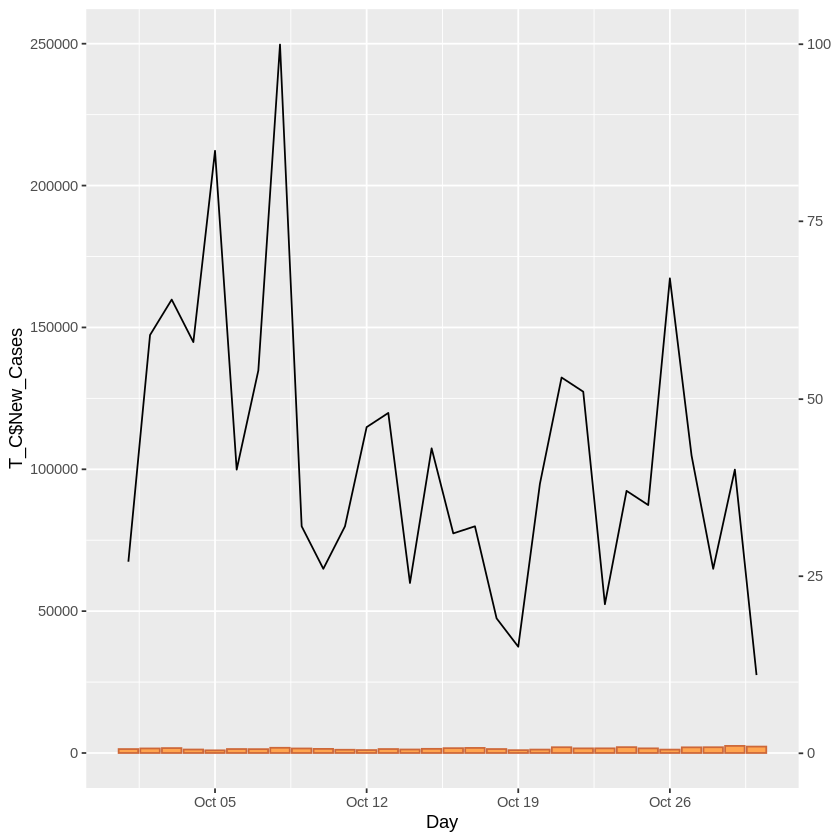

In [ ]:
##
ggplot(T_C)  + 
    geom_bar(aes(x=Day, y= T_C$New_Cases),stat="identity", fill="tan1", colour="sienna3")+
    geom_line(aes(x=Day, y=Google_Search_Interest*max(T_C$New_Cases)),stat="identity")+
    scale_y_continuous(sec.axis = sec_axis(~./max(T_C$New_Cases)))

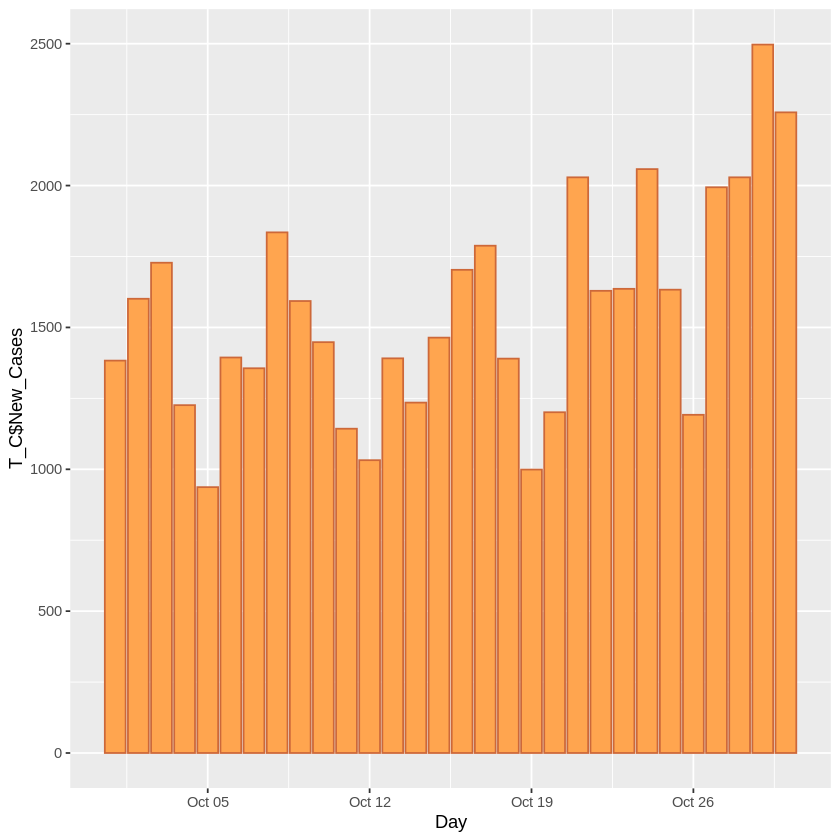

In [ ]:
ggplot(T_C)  + 
    geom_bar(aes(x=Day, y= T_C$New_Cases),stat="identity", fill="tan1", colour="sienna3")

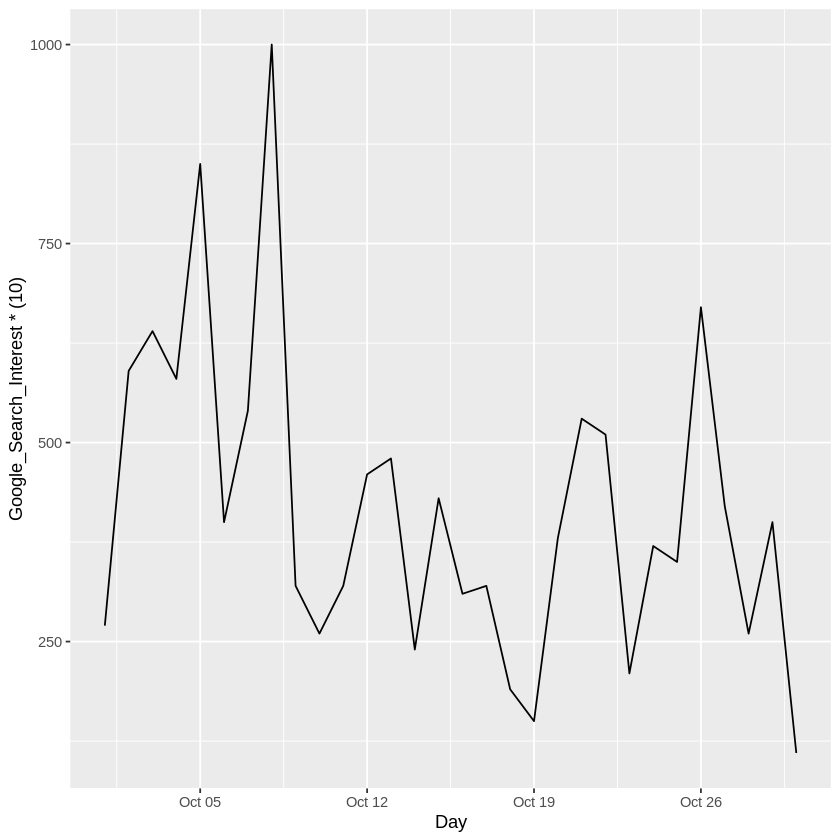

In [ ]:
ggplot(T_C)  + 
    geom_line(aes(x=Day, y=Google_Search_Interest*(10)),stat="identity")

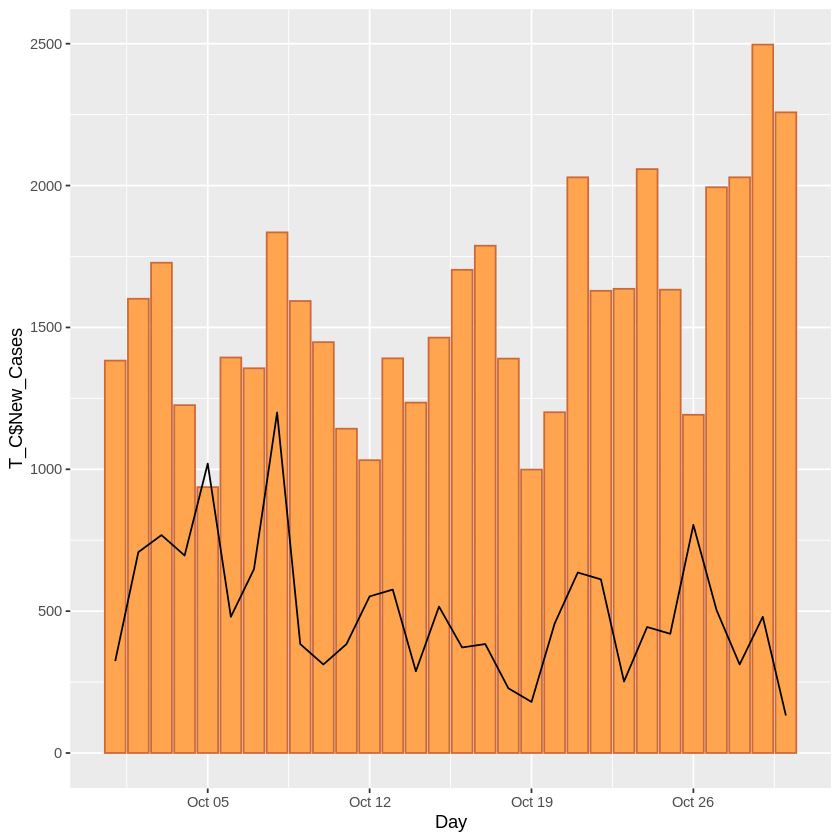

In [ ]:
ggplot(T_C)  + 
    geom_bar(aes(x=Day, y= T_C$New_Cases),stat="identity", fill="tan1", colour="sienna3")+
    geom_line(aes(x=Day, y=Google_Search_Interest*(12)),stat="identity")
